## Práctica 5
#### Operaciones con DataFrames, limpieza y transformaciones de datos.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

Preguntar:
- 12
- typo 13 (pide minuscula sugiere usar `str.upper()` y no `str.lower()` )
- 14
- 15 (es identico al 4)
- 17.c (linea 11)

In [3]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
# Ejercicio 1
(
    penguins[(penguins["island"] == "Biscoe") & (penguins["bill_length_mm"] >= 48)]
).head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
231,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,Male
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,Male


In [5]:
# Ejercicio 2
(
    penguins[(penguins["species"] == "Adelie") & (penguins["sex"] == "Male") & (penguins["island"] != "Biscoe")]
).head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [6]:
# Ejercicio 3
penguins.drop(columns=["sex", "body_mass_g"]).head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0
1,Adelie,Torgersen,39.5,17.4,186.0
2,Adelie,Torgersen,40.3,18.0,195.0
3,Adelie,Torgersen,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0


In [7]:
# Ejercicio 4
(
    penguins[penguins["island"] != "Biscoe"]
    .drop(columns="sex")
    .rename(columns={"species":"especie_pinguino"})
    .groupby(["especie_pinguino"])
    .mean([col for col in penguins.columns if "length" in col])
    .rename(columns={
        "bill_length_mm" : "bill_length_mm_mean",
        "flipper_length_mm" : "flipper_length_mm_mean"
    })
).head()

,bill_length_mm_mean,bill_depth_mm,flipper_length_mm_mean,body_mass_g
especie_pinguino,,,,
Adelie,38.715888,18.336449,190.429907,3696.962617
Chinstrap,48.833824,18.420588,195.823529,3733.088235


In [8]:
# Ejercicio 5
(
    penguins
    .rename(columns = {"species" : "especies"})
    .rename(columns={
        "flipper_length_mm" : "aleta_mm",
        "body_mass_g" : "peso_g"
    })
    #.rename(columns=str.upper)
    .rename(index=lambda n : n + 1)
    .rename(columns=lambda s : str.upper(s))
).head()

,ESPECIES,ISLAND,BILL_LENGTH_MM,BILL_DEPTH_MM,ALETA_MM,PESO_G,SEX
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
# Ejercicio 6
banco_macro_full_dataset = pd.read_csv("../../datasets/macro_full_columns.csv")
banco_macro_full_dataset.head()

,Unnamed: 0,Anio,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_Per_Cap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__vari_Porc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
0,1,1950,20353627362,6.685869e+08,5.844002e+08,3119383475,8.631124e+08,1.046560e+11,21706316451,1.072959e+10,...,1.420980e+11,8230.718755,6061.927168,1265.389774,NaN,NaN,NaN,1.420980e+11,0.292917,NaN
1,2,1951,21739314091,8.427402e+08,2.532758e+09,3562534310,1.292775e+09,1.105380e+11,21767097618,8.455494e+09,...,1.474360e+11,8360.967138,6268.494407,1442.153759,0.015825,0.034076,0.139691,1.474360e+11,0.303920,0.037563
2,3,1952,19685428171,1.119084e+09,1.484422e+09,3440750327,1.088416e+09,1.051080e+11,21455589059,6.224082e+09,...,1.404910e+11,7806.866125,5840.680245,1293.154332,-0.066272,-0.068248,-0.103317,1.404910e+11,0.289604,-0.047104
3,4,1953,20237375978,1.207891e+09,1.459989e+09,3621895632,8.869267e+08,1.064030e+11,20742065172,9.619869e+09,...,1.473240e+11,8027.665603,5797.868309,1290.488829,0.028283,-0.007330,-0.002061,1.473240e+11,0.303689,0.048637
4,5,1954,19372130307,1.173452e+09,8.059002e+08,4121320340,7.830799e+08,1.143920e+11,21238933697,1.020162e+10,...,1.533160e+11,8196.878491,6115.886428,1230.475866,0.021079,0.054851,-0.046504,1.533160e+11,0.316039,0.040667


In [10]:
# Muestra cantidad de valores NaN por columna
banco_macro_full_dataset.isna().sum(axis=0)
# Muestra True si hay al menos un valor NaN en la columna
banco_macro_full_dataset.isna().any(axis=0)
# Convertimos a dataframe y luego a lista
banco_macro_full_dataset.columns[banco_macro_full_dataset.isna().any(axis=0)].to_list()


['EXPO_OTAGRIC_2004',
 'EXPO_PESCA_2004',
 'EXPO_ALIMENT_2004',
 'EXPO_TEXTIL_2004',
 'EXPO_CUEROIND_2004',
 'EXPO_PAPEL_2004',
 'EXPO_CAUCHO_2004',
 'EXPO_QUIMICO_2004',
 'EXPO_COMBIUST_2004',
 'EXPO_HIERRO_2004',
 'EXPO_METNOFERR_2004',
 'EXPO_MAQUIN_2004',
 'EXPO_RESTOIND_2004',
 'PIB_perCap__variPorc',
 'Vol_Cons_Hogares_per_Cap__vari_Porc',
 'Vol_FBKF_perCap__variPorc',
 'IPI__variPorc']

In [11]:
# Muestro años con datos faltantes
banco_macro_full_dataset[banco_macro_full_dataset.isna().any(axis=1)]["Anio"].to_numpy()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965])

In [12]:
# Convierto NaN a 0
banco_macro_full_dataset = banco_macro_full_dataset.fillna(0)
banco_macro_full_dataset.isna()

,Unnamed: 0,Anio,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_Per_Cap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__vari_Porc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Ejercicio 7
penguins = sns.load_dataset("penguins")
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [14]:
# Dropeo las filas que tienen algun NaN
# penguins = penguins.dropna(axis=0)
# Concatenado con reset de index seria asi
penguins = penguins.dropna(axis=0).reset_index()
penguins.index

RangeIndex(start=0, stop=333, step=1)

In [15]:
# Ejercicio 8
penguins.columns = [col.upper() for col in penguins.columns]
penguins.head()

,INDEX,SPECIES,ISLAND,BILL_LENGTH_MM,BILL_DEPTH_MM,FLIPPER_LENGTH_MM,BODY_MASS_G,SEX
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [16]:
# Ejercicio 9
penguins = sns.load_dataset("penguins")
penguins.columns = [col.upper() if "bill" in col else col for col in penguins.columns]
penguins.head()

,species,island,BILL_LENGTH_MM,BILL_DEPTH_MM,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [17]:
# Ejercicio 10
penguins = sns.load_dataset("penguins")
penguins["peso_bin"] = ["chico" if penguins["body_mass_g"][i] < 4000 else "grande" for i in range(len(penguins["body_mass_g"]))]
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,peso_bin
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,chico
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,chico
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,chico
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,grande
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,chico


In [18]:
# Ejercicio 11
penguins = sns.load_dataset("penguins")
(
    penguins[penguins["flipper_length_mm"] >= 200]
    .drop(columns=[col for col in penguins.columns if "_mm" not in col])
).head()

,bill_length_mm,bill_depth_mm,flipper_length_mm
53,42.0,19.5,200.0
90,35.7,18.0,202.0
91,41.1,18.1,205.0
95,40.8,18.9,208.0
101,41.0,20.0,203.0


In [19]:
# Ejercicio 12
penguins = sns.load_dataset("penguins")
(
    penguins[penguins["island"] == "Dream"]
    .drop(columns=[col for col in penguins.columns if "bill" not in col]) # resolver, no se como agregar species
).head()

,bill_length_mm,bill_depth_mm
30,39.5,16.7
31,37.2,18.1
32,39.5,17.8
33,40.9,18.9
34,36.4,17.0


In [20]:
# Ejercicio 13
penguins = sns.load_dataset("penguins")
penguins = penguins.rename(columns={"body_mass_g" : "peso_g"})
penguins["peso_kg"] = [peso/1000 for peso in penguins["peso_g"]]
penguins["island"] = penguins["island"].str.lower()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,peso_g,sex,peso_kg
0,Adelie,torgersen,39.1,18.7,181.0,3750.0,Male,3.75
1,Adelie,torgersen,39.5,17.4,186.0,3800.0,Female,3.80
2,Adelie,torgersen,40.3,18.0,195.0,3250.0,Female,3.25
3,Adelie,torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,torgersen,36.7,19.3,193.0,3450.0,Female,3.45


In [21]:
# Ejercicio 14
penguins = sns.load_dataset("penguins")
# penguins.groupby("species").agg('mean')

In [22]:
# Ejercicio 15
penguins = sns.load_dataset("penguins")
# Es literalmente el ejercicio 4

In [38]:
# Ejercicio 16
macroFull = pd.read_csv("../../datasets/macro_full_columns.csv")
# 16.a
macroFull = macroFull.set_index("Anio")

In [39]:
# 16.b
lista = macroFull.columns.tolist()
lista

['Unnamed: 0',
 'FBKF.Construcciones.Priv_Publ',
 'FBKF.Equi_Dur_Prod.Mat_Transp.Nac',
 'FBKF.Equi_Dur_Prod.Mat_Transp.Import',
 'FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac',
 'FBKF.Equi_Dur_Prod.Maqui_YEqui.Import',
 'Consumo.Hogares',
 'Consumo.Gobierno',
 'Exportaciones',
 'Importaciones',
 'GIB',
 'FKBF',
 'EXPO_TOT_2004',
 'EXPO_AGROP_2004',
 'EXPO_PAMP_2004',
 'EXPO_PECUAR_2004',
 'EXPO_CARNES_2004',
 'EXPO_LECHE_2004',
 'EXPO_LANAS_2004',
 'EXPO_CUEROS_PP_2004',
 'EXPO_AGRIC_2004',
 'EXPO_CEREAL_2004',
 'EXPO_OLEAGI_2004',
 'EXPO_OTAGRIC_2004',
 'EXPO_PESCA_2004',
 'EXPO_INDUST_2004',
 'EXPO_ALIMENT_2004',
 'EXPO_TEXTIL_2004',
 'EXPO_CUEROIND_2004',
 'EXPO_PAPEL_2004',
 'EXPO_CAUCHO_2004',
 'EXPO_QUIMICO_2004',
 'EXPO_COMBIUST_2004',
 'EXPO_HIERRO_2004',
 'EXPO_METNOFERR_2004',
 'EXPO_MAQUIN_2004',
 'EXPO_RESTOIND_2004',
 'Consumo.Hogares.ipi.demanda',
 'Consumo.Gobierno.ipi.demanda',
 'FBKF.Construcciones.Priv_Publ.ipi.demanda',
 'FBKF.Equi_Dur_Prod.Mat_Transp.Nac.ipi.demanda',
 'FBKF.

In [40]:
macroFull = macroFull.drop(columns="Unnamed: 0")
macroFull.head()

,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,Importaciones,GIB,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_Per_Cap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__vari_Porc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
Anio,,,,,,,,,,,,,,,,,,,,,
1950,20353627362,6.685869e+08,5.844002e+08,3119383475,8.631124e+08,1.046560e+11,21706316451,1.072959e+10,1.403947e+10,1.420980e+11,...,1.420980e+11,8230.718755,6061.927168,1265.389774,NaN,NaN,NaN,1.420980e+11,0.292917,NaN
1951,21739314091,8.427402e+08,2.532758e+09,3562534310,1.292775e+09,1.105380e+11,21767097618,8.455494e+09,1.574444e+10,1.474360e+11,...,1.474360e+11,8360.967138,6268.494407,1442.153759,0.015825,0.034076,0.139691,1.474360e+11,0.303920,0.037563
1952,19685428171,1.119084e+09,1.484422e+09,3440750327,1.088416e+09,1.051080e+11,21455589059,6.224082e+09,1.163759e+10,1.404910e+11,...,1.404910e+11,7806.866125,5840.680245,1293.154332,-0.066272,-0.068248,-0.103317,1.404910e+11,0.289604,-0.047104
1953,20237375978,1.207891e+09,1.459989e+09,3621895632,8.869267e+08,1.064030e+11,20742065172,9.619869e+09,9.626751e+09,1.473240e+11,...,1.473240e+11,8027.665603,5797.868309,1290.488829,0.028283,-0.007330,-0.002061,1.473240e+11,0.303689,0.048637
1954,19372130307,1.173452e+09,8.059002e+08,4121320340,7.830799e+08,1.143920e+11,21238933697,1.020162e+10,1.250629e+10,1.533160e+11,...,1.533160e+11,8196.878491,6115.886428,1230.475866,0.021079,0.054851,-0.046504,1.533160e+11,0.316039,0.040667


In [41]:
# 16.c 
macroFull.columns = [col.replace("vari_Porc", "variPorc") if (col.endswith("vari_Porc") == True) else col for col in macroFull.columns]
macroFull.head() # soy la puta cabra bld xD

,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,Importaciones,GIB,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_Per_Cap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__variPorc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
Anio,,,,,,,,,,,,,,,,,,,,,
1950,20353627362,6.685869e+08,5.844002e+08,3119383475,8.631124e+08,1.046560e+11,21706316451,1.072959e+10,1.403947e+10,1.420980e+11,...,1.420980e+11,8230.718755,6061.927168,1265.389774,NaN,NaN,NaN,1.420980e+11,0.292917,NaN
1951,21739314091,8.427402e+08,2.532758e+09,3562534310,1.292775e+09,1.105380e+11,21767097618,8.455494e+09,1.574444e+10,1.474360e+11,...,1.474360e+11,8360.967138,6268.494407,1442.153759,0.015825,0.034076,0.139691,1.474360e+11,0.303920,0.037563
1952,19685428171,1.119084e+09,1.484422e+09,3440750327,1.088416e+09,1.051080e+11,21455589059,6.224082e+09,1.163759e+10,1.404910e+11,...,1.404910e+11,7806.866125,5840.680245,1293.154332,-0.066272,-0.068248,-0.103317,1.404910e+11,0.289604,-0.047104
1953,20237375978,1.207891e+09,1.459989e+09,3621895632,8.869267e+08,1.064030e+11,20742065172,9.619869e+09,9.626751e+09,1.473240e+11,...,1.473240e+11,8027.665603,5797.868309,1290.488829,0.028283,-0.007330,-0.002061,1.473240e+11,0.303689,0.048637
1954,19372130307,1.173452e+09,8.059002e+08,4121320340,7.830799e+08,1.143920e+11,21238933697,1.020162e+10,1.250629e+10,1.533160e+11,...,1.533160e+11,8196.878491,6115.886428,1230.475866,0.021079,0.054851,-0.046504,1.533160e+11,0.316039,0.040667


In [42]:
# 16.d
macroFull.columns = [col.replace("_Per_Cap", "_perCap") if (col.endswith("_Per_Cap") == True) else col for col in macroFull.columns]
macroFull.head()

,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,Importaciones,GIB,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_perCap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__variPorc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
Anio,,,,,,,,,,,,,,,,,,,,,
1950,20353627362,6.685869e+08,5.844002e+08,3119383475,8.631124e+08,1.046560e+11,21706316451,1.072959e+10,1.403947e+10,1.420980e+11,...,1.420980e+11,8230.718755,6061.927168,1265.389774,NaN,NaN,NaN,1.420980e+11,0.292917,NaN
1951,21739314091,8.427402e+08,2.532758e+09,3562534310,1.292775e+09,1.105380e+11,21767097618,8.455494e+09,1.574444e+10,1.474360e+11,...,1.474360e+11,8360.967138,6268.494407,1442.153759,0.015825,0.034076,0.139691,1.474360e+11,0.303920,0.037563
1952,19685428171,1.119084e+09,1.484422e+09,3440750327,1.088416e+09,1.051080e+11,21455589059,6.224082e+09,1.163759e+10,1.404910e+11,...,1.404910e+11,7806.866125,5840.680245,1293.154332,-0.066272,-0.068248,-0.103317,1.404910e+11,0.289604,-0.047104
1953,20237375978,1.207891e+09,1.459989e+09,3621895632,8.869267e+08,1.064030e+11,20742065172,9.619869e+09,9.626751e+09,1.473240e+11,...,1.473240e+11,8027.665603,5797.868309,1290.488829,0.028283,-0.007330,-0.002061,1.473240e+11,0.303689,0.048637
1954,19372130307,1.173452e+09,8.059002e+08,4121320340,7.830799e+08,1.143920e+11,21238933697,1.020162e+10,1.250629e+10,1.533160e+11,...,1.533160e+11,8196.878491,6115.886428,1230.475866,0.021079,0.054851,-0.046504,1.533160e+11,0.316039,0.040667


In [43]:
# 17.a
macroFull_oferta = macroFull.drop(columns=[col for col in macroFull.columns if not col.endswith(".oferta")])
macroFull_oferta.head()

,Agricultura_caza_silvicultura_y_pesca.oferta,Explotacion_de_minas_y_canteras.oferta,Industria_manufacturera.oferta,Electricidad_gas_y_agua.oferta,Construccion.oferta,Comercio_hoteles_y_restaurantes.oferta,Transp_Almac_y_Comunics.oferta,Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta,Servs_Socs_Comunales_Y_Personales.oferta,Impuesto_Prod_Netos_De_Subsid.oferta,PBI_a_precios_de_mercado.oferta
Anio,,,,,,,,,,,
1950,13696637358,1452011417,3.230475e+10,198218385.1,5918090281,2.528165e+10,7262970408,1.955076e+10,2.174366e+10,1.469771e+10,1.420980e+11
1951,14629457210,1686941522,3.314928e+10,212725994.5,6060937395,2.626086e+10,7534071597,1.990274e+10,2.236844e+10,1.539495e+10,1.474360e+11
1952,12545616104,1794762161,3.252291e+10,227896262.1,5571363747,2.441732e+10,7017131008,2.059880e+10,2.257738e+10,1.464870e+10,1.404910e+11
1953,16402296333,1925706862,3.234105e+10,242404260.9,5546340195,2.400975e+10,7210541490,2.071623e+10,2.307222e+10,1.525787e+10,1.473240e+11
1954,16308747029,2037374129,3.490353e+10,263839496.4,5308705373,2.549291e+10,7558082163,2.127848e+10,2.379781e+10,1.607831e+10,1.533160e+11


In [44]:
# 17.b
X = macroFull_oferta.drop(columns="PBI_a_precios_de_mercado.oferta")
y = macroFull_oferta["PBI_a_precios_de_mercado.oferta"]

In [46]:
print(X.shape) # claro estoy re gaga tengo un hiperplano de 10 variables XD
print(y.shape)
X.iloc[:, 0]

(66, 10)
(66,)


Anio
1950    13696637358
1951    14629457210
1952    12545616104
1953    16402296333
1954    16308747029
           ...     
2011    51232247600
2012    44579958519
2013    49721752068
2014    51321551605
2015    54675970819
Name: Agricultura_caza_silvicultura_y_pesca.oferta, Length: 66, dtype: int64

In [49]:
#17.c 
# importo librerias
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from formulaic import Formula

# creamos modelo
modelo = linear_model.LinearRegression()
modelo.fit(X, y) # manotazo de ahogado pq no se que hacer xD, no se como solucionar que no tome 10 variables
beta_1 = modelo.coef_[0]
beta_0 = modelo.intercept_ # no tengo idea de porque me deja asi solamente 'o'
# edit: creo que es porque estoy usando fit con (pd.DataFrame, pd.Series) (??)

# metricas de precision
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred) 

In [ ]:
print(modelo.coef_)
print("R2: ", r2)
print("MSE: ", mse)
print("y_pred: ", y_pred, y_pred.shape, y.shape)
print(y.tolist())


[13.71100269]
R2:  0.9403042158971846
MSE:  1.5630745108866573e+21
y_pred:  [1.52104058e+11 1.64893953e+11 1.36322402e+11 1.89201355e+11
 1.87918701e+11 1.97139955e+11 1.86501580e+11 1.85413256e+11
 1.95039257e+11 1.92704129e+11 1.96500064e+11 1.94998796e+11
 2.04331881e+11 2.08984463e+11 2.26053759e+11 2.41570644e+11
 2.31214522e+11 2.42675352e+11 2.27575173e+11 2.42008605e+11
 2.57594994e+11 2.62459879e+11 2.67425194e+11 2.99512770e+11
 3.11462320e+11 2.98165297e+11 3.13471940e+11 3.22800612e+11
 3.27722521e+11 3.42567672e+11 3.17894476e+11 3.34293171e+11
 3.69655646e+11 3.80501395e+11 3.78380367e+11 3.69219573e+11
 3.67501505e+11 3.58204834e+11 3.92104421e+11 3.34533582e+11
 3.74323251e+11 3.98751638e+11 3.89813991e+11 3.94255162e+11
 4.24233170e+11 4.49848487e+11 4.43183507e+11 4.44056476e+11
 4.82017434e+11 4.94143415e+11 4.84511381e+11 4.92654620e+11
 4.84796646e+11 5.26120303e+11 5.20139291e+11 6.24656037e+11
 6.21196525e+11 6.77286820e+11 6.61752389e+11 4.79618286e+11
 6.834281

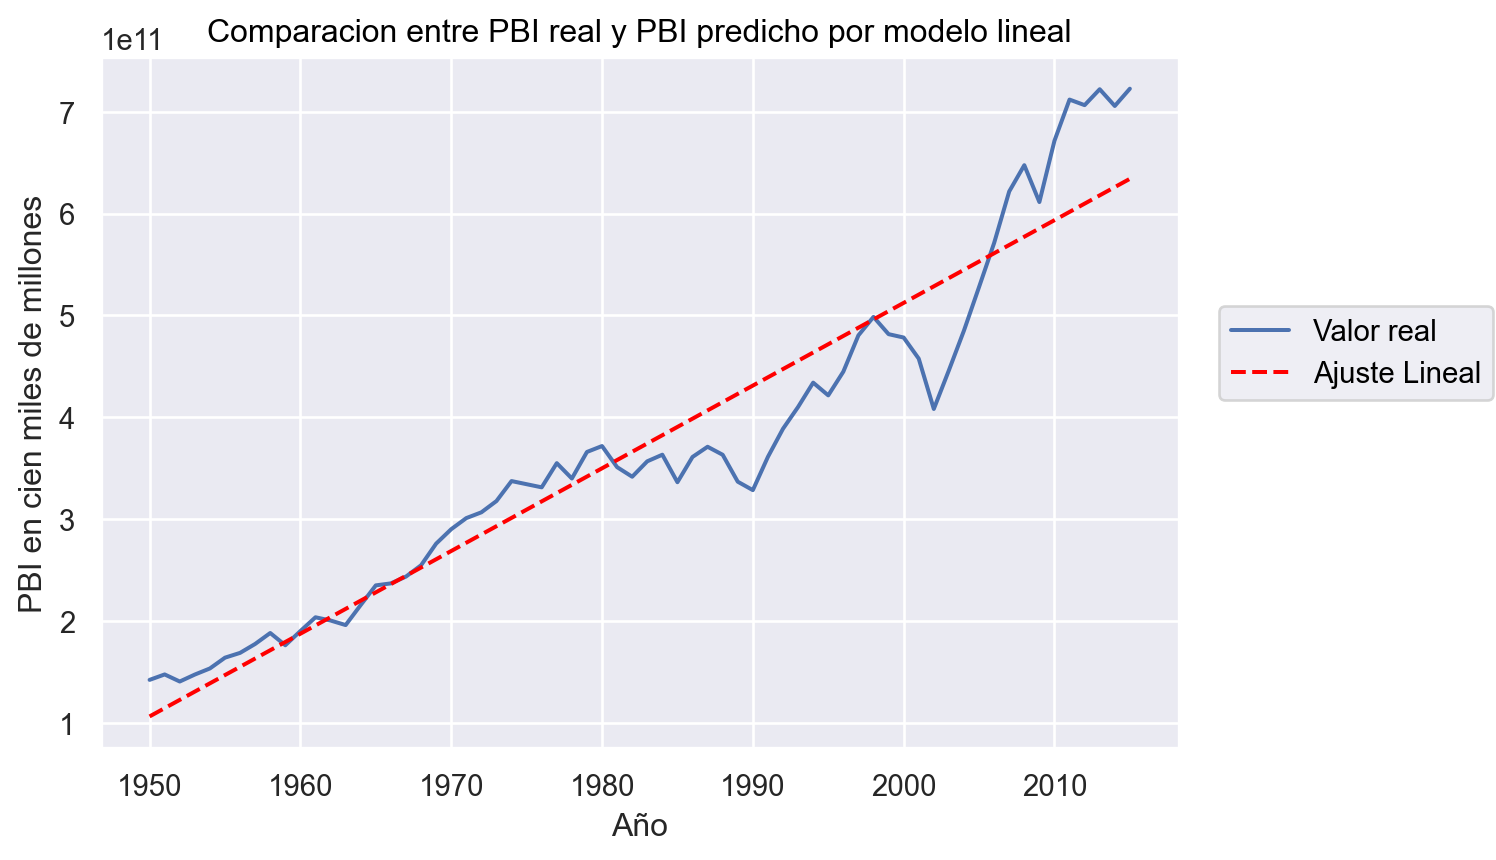

In [ ]:
# Encima es raro porque lo que queremos es esto pero 
# en lugar de usar polyfit deberia de poder usar el y_pred
# Nota 1: Ok, claramente estamos overfitteando, arriba me da que R2 = 1
# Nota 2: me voy a pegar un corchazo, no se como solucionar el y_pred para que sea igual que el polyfit. Preguntar en clase
(
    so.Plot(data=macroFull_oferta, x=y.index, y=y)
    .add(so.Line(), label="Valor real")
    .add(so.Line(color="red", linestyle="dashed"), so.PolyFit(1), label="Ajuste Lineal")
    .label(title="Comparacion entre PBI real y PBI predicho por modelo lineal", 
           x="Año",
           y="PBI en cien miles de millones")
)

#### Ejercicio 18
Hallar un escalamiento lineal $f(x)$ que transforme los valores en el intervalo $[2, 5]$ a valores en el intevalo $[0, 1]$

Solucion:

Necesitamos que $ f(0) = 2$ y que $f(1)=5$ en alguna funcion $y=mx+b$. Es trivial pues reemplazamos $b=2$, y luego
$$ y=mx+2$$
Reemplazamos con segunda condicion,
$$ 5=m+2$$
$$ m = 3$$
Por tanto, $ f(x)=3x+2$.
Me acabo de dar cuenta que era al reves. Considerar funcion pedida $f^{-1}(x) =\frac{1}{3}x -\frac{2}{3}$. 
